<a href="https://colab.research.google.com/github/OMKARTT/Monk_Object_Detection/blob/master/Example-Underwater%20Trash%20Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents


## 1. Installation Instructions



## 2. Use trained model to segment people in imagery



## 3. How to train a custom segmenter using "Human Parsing Dataset"

# About the networks


1. UNet
  - https://arxiv.org/abs/1505.04597
  - https://towardsdatascience.com/understanding-semantic-segmentation-with-unet-6be4f42d4b47
  - https://towardsdatascience.com/unet-line-by-line-explanation-9b191c76baf5


2. FPN
  - http://openaccess.thecvf.com/content_cvpr_2017/papers/Lin_Feature_Pyramid_Networks_CVPR_2017_paper.pdf
  - https://towardsdatascience.com/review-fpn-feature-pyramid-network-object-detection-262fc7482610
  - https://medium.com/@jonathan_hui/understanding-feature-pyramid-networks-for-object-detection-fpn-45b227b9106c


3. PSPNet
  - https://arxiv.org/abs/1612.01105
  - https://towardsdatascience.com/review-pspnet-winner-in-ilsvrc-2016-semantic-segmentation-scene-parsing-e089e5df177d
  - https://developers.arcgis.com/python/guide/how-pspnet-works/


4. Linknet
  - https://arxiv.org/pdf/1707.03718.pdf
  - https://neptune.ai/blog/image-segmentation-tips-and-tricks-from-kaggle-competitions

# **Installation**

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 10405, done.
remote: Total 10405 (delta 0), reused 0 (delta 0), pack-reused 10405
Receiving objects: 100% (10405/10405), 256.41 MiB | 38.48 MiB/s, done.
Resolving deltas: 100% (4611/4611), done.
Checking out files: 100% (8418/8418), done.


In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/9_segmentation_models/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install


# For Local systems and cloud select the right CUDA version
#! cd Monk_Object_Detection/9_segmentation_models/installation && cat requirements_cuda10.0.txt | xargs -n 1 -L 1 pip install

# **Use already trained model**

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/9_segmentation_models/lib/");

In [ ]:
from infer_segmentation import Infer

Using TensorFlow backend.


Segmentation Models: using `keras` framework.


In [ ]:
gtf = Infer();

In [ ]:
classes_dict = {
    'background': 0,
    'rov': 1,'plant':2,'animal':3,'trash':4
    };
classes_to_train = ['rov','plant','animal','trash'];

In [ ]:
gtf.Data_Params(classes_dict, classes_to_train, image_shape=[384,384])

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1C5aOia2jqGaX8Gkdf6h3icP4bAtKLgxw' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1C5aOia2jqGaX8Gkdf6h3icP4bAtKLgxw" -O seg_underwater_trash_trained.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq seg_underwater_trash_trained.zip

In [ ]:
gtf.Model_Params(model="Unet", backbone="efficientnetb3", path_to_model='/content/Segmentation/best_model.h5')

In [ ]:
gtf.Setup();

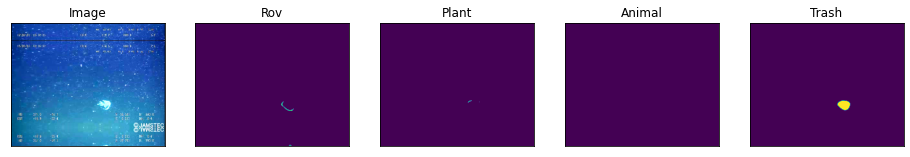

In [ ]:
gtf.Predict("/content/Segmentation/vid_000002_frame0000018.jpg", vis=True);

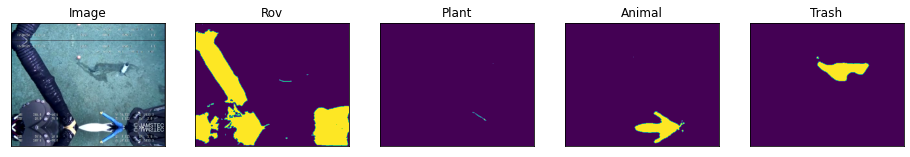

In [ ]:
gtf.Predict("/content/Segmentation/vid_000052_frame0000074.jpg", vis=True);

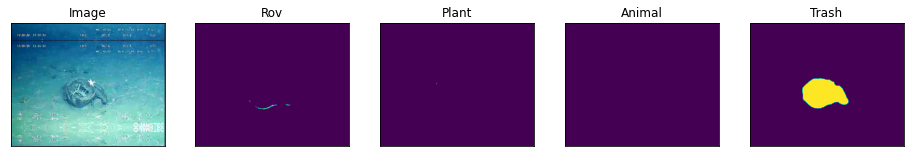

In [ ]:
gtf.Predict("/content/Segmentation/vid_000073_frame0000055.jpg", vis=True);

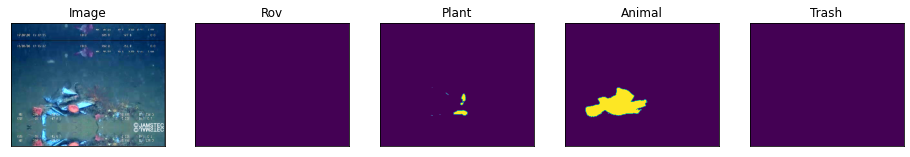

In [ ]:
gtf.Predict("/content/Segmentation/vid_000077_frame0000029.jpg", vis=True);

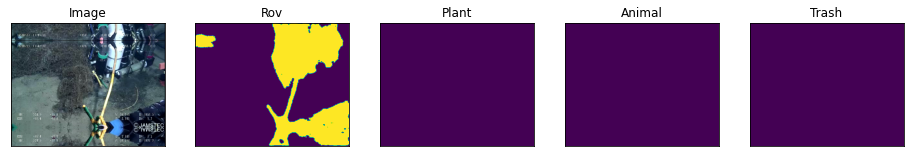

In [ ]:
gtf.Predict("/content/Segmentation/vid_000095_frame0000001.jpg", vis=True);

# **Train your own detector**

# Monk Format

## Dataset Directory Structure

      root_dir
          |
          | 
          |         
          |----train_img_dir
          |       |
          |       |---------img1.jpg
          |       |---------img2.jpg
          |                |---------..........(and so on) 
          |
          |----train_mask_dir
          |       |
          |       |---------img1.jpg
          |       |---------img2.jpg
          |                |---------..........(and so on)
          |
          |----val_img_dir (optional)
          |       |
          |       |---------img1.jpg
          |       |---------img2.jpg
          |                |---------..........(and so on)
          |
          |----val_mask_dir (optional)
          |       |
          |       |---------img1.jpg
          |       |---------img2.jpg
          |                |---------..........(and so on)


**Download Dataset**

Dataset credit- https://conservancy.umn.edu/handle/11299/214865

In [ ]:
!wget https://conservancy.umn.edu/bitstream/handle/11299/214865/dataset.zip?sequence=12&isAllowed=y

--2020-10-08 13:04:05--  https://conservancy.umn.edu/bitstream/handle/11299/214865/dataset.zip?sequence=12
Resolving conservancy.umn.edu (conservancy.umn.edu)... 128.101.122.105
Connecting to conservancy.umn.edu (conservancy.umn.edu)|128.101.122.105|:443... connected.
HTTP request sent, awaiting response... 200 200
Length: 553029970 (527M) [application/zip]
Saving to: ‘dataset.zip?sequence=12’

dataset.zip?sequenc 100%[===================>] 527.41M  7.51MB/s    in 50s     

2020-10-08 13:04:55 (10.6 MB/s) - ‘dataset.zip?sequence=12’ saved [553029970/553029970]



In [ ]:
!cp dataset.zip?sequence=12 dataset.zip
!rm dataset.zip?sequence=12
!unzip dataset.zip

**Generating mask images**

In [ ]:
!git clone https://github.com/philferriere/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 994, done.
remote: Total 994 (delta 0), reused 0 (delta 0), pack-reused 994
Receiving objects: 100% (994/994), 12.26 MiB | 32.27 MiB/s, done.
Resolving deltas: 100% (588/588), done.


In [ ]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import random
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### For visualizing the outputs ###
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [ ]:
dataDir='/content/dataset/material_version'
dataType='train'
annFile='/content/dataset/material_version/instances_train_trashcan.json'.format(dataDir,dataType)

# Initialize the COCO api for instance annotations
coco=COCO(annFile)

# Load the categories in a variable
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)
print(len(cats))
print(cats)
print(catIDs)

loading annotations into memory...
Done (t=0.28s)
creating index...
index created!
16
[{'supercategory': 'rov', 'id': 1, 'name': 'rov'}, {'supercategory': 'plant', 'id': 2, 'name': 'plant'}, {'supercategory': 'animal_fish', 'id': 3, 'name': 'animal_fish'}, {'supercategory': 'animal_starfish', 'id': 4, 'name': 'animal_starfish'}, {'supercategory': 'animal_shells', 'id': 5, 'name': 'animal_shells'}, {'supercategory': 'animal_crab', 'id': 6, 'name': 'animal_crab'}, {'supercategory': 'animal_eel', 'id': 7, 'name': 'animal_eel'}, {'supercategory': 'animal_etc', 'id': 8, 'name': 'animal_etc'}, {'supercategory': 'trash_etc', 'id': 9, 'name': 'trash_etc'}, {'supercategory': 'trash_fabric', 'id': 10, 'name': 'trash_fabric'}, {'supercategory': 'trash_fishing_gear', 'id': 11, 'name': 'trash_fishing_gear'}, {'supercategory': 'trash_metal', 'id': 12, 'name': 'trash_metal'}, {'supercategory': 'trash_paper', 'id': 13, 'name': 'trash_paper'}, {'supercategory': 'trash_plastic', 'id': 14, 'name': 'trash

In [ ]:
def getClassName(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return "None"
print('The class name is', getClassName(2, cats))

The class name is plant


In [ ]:
# Define the classes (out of the 81) which you want to see. Others will not be shown.
filterClasses = ['none']

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))


Number of images containing all the  classes: 6008


In [ ]:
os.mkdir("/content/dataset/material_version/train_mask")


1. Balancing dataset with taking fix number of images from each category.
2. We are grouping images  in 4 different classes

In [ ]:
def pixel_value(index):
  #print("Categoory",index)
  if index==1:    #rov
    return 1
  elif index==2:   # plant
    return 2
  elif index>=3 and index<=8:   #animal
    return 3
  elif index>=9 and index<=16:  #trash
    return 4

In [ ]:
fix=20

In [ ]:
clcount=[0]*17

In [ ]:
clscount=[0,150,150,20,20,20,20,20,20,20,20,20,20,20,20,20,20]
clscount[1]

150

In [ ]:
def class_count(count):
  global clcount
  if clcount[count]<=clscount[count]:
    clcount[count]=clcount[count]+1
    return 0
  else:
    return 1

In [ ]:
count1=0
count2=0
count3=0
count4=0

In [ ]:
def classcount(mul):
  global count1
  global count2
  global count3
  global count4
  if mul==1:
    count1=count1+1
    return 0
  elif mul==2 :
    count2=count2+1
    return 0
  elif mul==3:
    count3=count3+1
    return 0
  elif mul==4:
    count4=count4+1
    return 0
  else:
    return 1

In [ ]:
def conversion(i):
  filterClasses = ['rov','plant','animal_fish','animal_starfish','animal_shells',
                  'animal_crab','animal_eel','animal_etc','trash_etc','trash_fabric',
                 'trash_fishing_gear','trash_metal','trash_paper','trash_plastic',
                 'trash_rubber','trash_wood']
  img = coco.loadImgs(imgIds[i])[0]
  print(img)
  I = io.imread('{}/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0
  annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
  #print(img['file_name'])
  #print(img['id'])
  anns = coco.loadAnns(annIds)
  mask = np.zeros((img['height'],img['width']))
  for a in range(len(anns)):
    global flag
    flag=1
    className = getClassName(anns[a]['category_id'], cats)
    #print(className)
    classId= filterClasses.index(className)+1
    mul=pixel_value(classId)
    #m=maskimg(i,mul,mask)
    categorycount=classcount(mul)
    flag =class_count(classId)
    print(flag)
    if flag==0:
      mask = np.maximum(coco.annToMask(anns[a])*mul, mask)
      cv2.imwrite("/content/dataset/material_version/train_mask/"+img['file_name'],mask);


In [ ]:
import cv2
import os
import numpy as np
from tqdm.notebook import tqdm
for i in tqdm(range(6008)):
  conversion(i)

In [ ]:
print(count1)
print(count2)
print(count3)
print(count4)
print(clcount)

2653
405
1750
4933
[0, 151, 151, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21]


In [ ]:
import os
print(len(os.listdir("/content/dataset/material_version/train/")))
print(len(os.listdir("/content/dataset/material_version/train_mask/")))

6008
443


In [ ]:
os.mkdir("/content/dataset/material_version/train_new")

In [ ]:
import cv2
import os
import numpy as np
from tqdm.notebook import tqdm
lst = os.listdir("/content/dataset/material_version/train_mask")
for i in tqdm(range(len(lst))):
    img_name = lst[i];
    img = cv2.imread("/content/dataset/material_version/train/" + lst[i], 1);
    cv2.imwrite("/content/dataset/material_version/train_new/" + lst[i],img);

In [ ]:
print(len(os.listdir("/content/dataset/material_version/train_new/")))

443


# **Training**

**Restart Runtime**

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/9_segmentation_models/lib/");

In [ ]:
from train_segmentation import Segmenter

Using TensorFlow backend.


Segmentation Models: using `keras` framework.


In [ ]:
gtf = Segmenter();

In [ ]:
img_dir = "/content/dataset/material_version/train_new";
mask_dir = "/content/dataset/material_version/train_mask";

In [ ]:
classes_dict = {
    'background': 0,
    'rov': 1,'plant':2,'animal':3,'trash':4
    };
classes_to_train = ['rov','plant','animal','trash'];

In [ ]:
gtf.Train_Dataset(img_dir, mask_dir, classes_dict, classes_to_train)

In [ ]:
gtf.List_Backbones();

Available backbones - ['vgg16', 'vgg19', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'seresnet18', 'seresnet34', 'seresnet50', 'seresnet101', 'seresnet152', 'resnext50', 'resnext101', 'seresnext50', 'seresnext101', 'senet154', 'densenet121', 'densenet169', 'densenet201', 'inceptionv3', 'inceptionresnetv2', 'mobilenet', 'mobilenetv2', 'efficientnetb0', 'efficientnetb1', 'efficientnetb2', 'efficientnetb3', 'efficientnetb4', 'efficientnetb5', 'efficientnetb6', 'efficientnetb7']


In [ ]:
gtf.Data_Params(batch_size=2, backbone="efficientnetb3", image_shape=[384,384])

In [ ]:
gtf.List_Models();

Available models - ['Unet', 'FPN', 'Linknet', 'PSPNet']


In [ ]:
gtf.Model_Params(model="Unet")

In [ ]:
gtf.Train_Params(lr=0.0001)

In [ ]:
gtf.Setup();

In [ ]:
gtf.Train(num_epochs=120);

In [ ]:
gtf.Visualize_Training_History();

# **Inference(Post training)**

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/9_segmentation_models/lib/");

In [ ]:
from infer_segmentation import Infer

In [ ]:
gtf = Infer();

In [ ]:
classes_dict = {
    'background': 0,
    'rov': 1,'plant':2,'animal':3,'trash':4
    };
classes_to_train = ['rov','plant','animal','trash'];

In [ ]:
gtf.Data_Params(classes_dict, classes_to_train, image_shape=[384,384])

In [ ]:
gtf.Model_Params(model="Unet", backbone="efficientnetb3", path_to_model='best_model.h5')

In [ ]:
gtf.Setup();

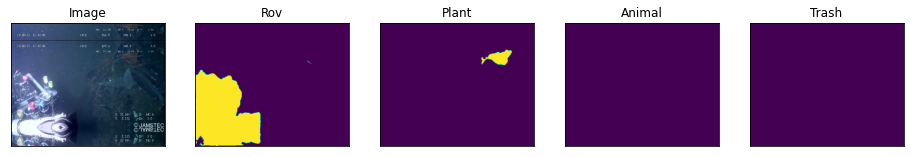

In [ ]:
gtf.Predict("/content/dataset/material_version/train/vid_000036_frame0000037.jpg", vis=True);

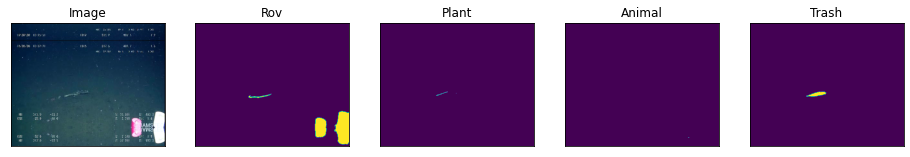

In [ ]:
gtf.Predict("/content/dataset/material_version/val/vid_000021_frame0000022.jpg", vis=True);

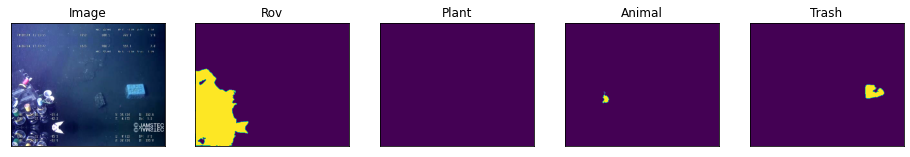

In [ ]:
gtf.Predict("/content/dataset/material_version/train/vid_000350_frame0000213.jpg", vis=True);

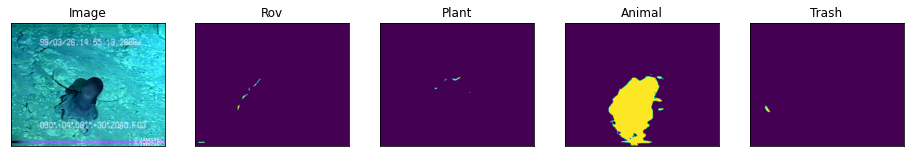

In [ ]:
gtf.Predict("/content/dataset/material_version/train/vid_000421_frame0000005.jpg", vis=True);

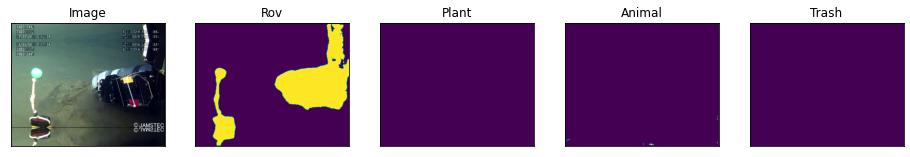

In [ ]:
gtf.Predict("/content/dataset/material_version/val/vid_000143_frame0000028.jpg", vis=True);

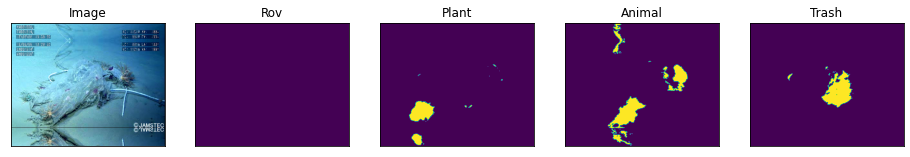

In [ ]:
gtf.Predict("/content/dataset/material_version/val/vid_000142_frame0000015.jpg", vis=True);

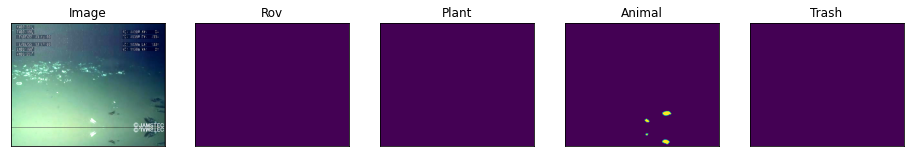

In [ ]:
gtf.Predict("/content/dataset/material_version/val/vid_000132_frame0000094.jpg", vis=True);

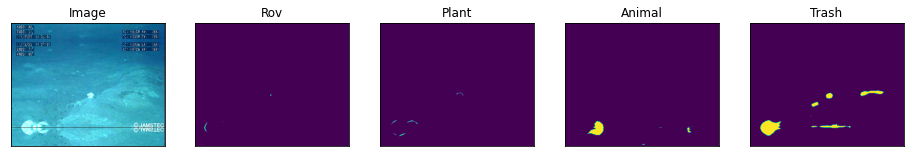

In [ ]:
gtf.Predict("/content/dataset/material_version/val/vid_000119_frame0000015.jpg", vis=True);

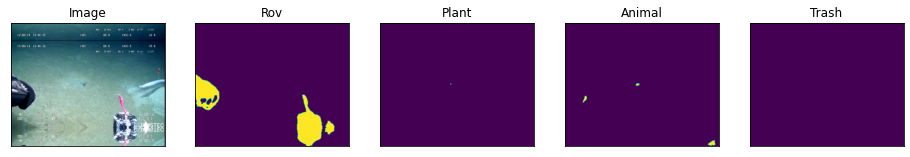

In [ ]:
gtf.Predict("/content/dataset/material_version/val/vid_000104_frame0000024.jpg", vis=True);

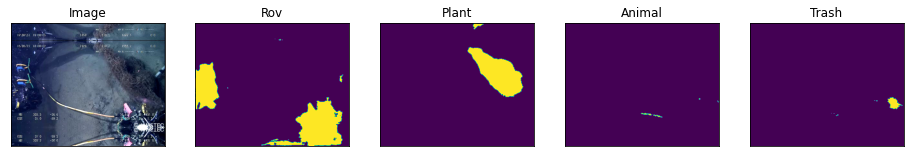

In [ ]:
gtf.Predict("/content/dataset/material_version/val/vid_000094_frame0000041.jpg", vis=True);

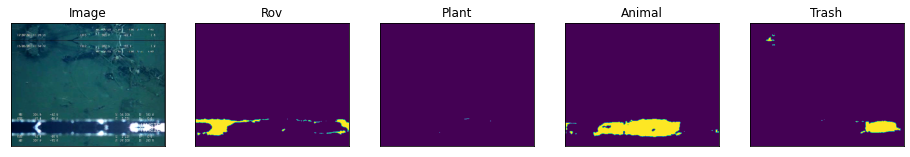

In [ ]:
gtf.Predict("/content/dataset/material_version/val/vid_000075_frame0000059.jpg", vis=True);

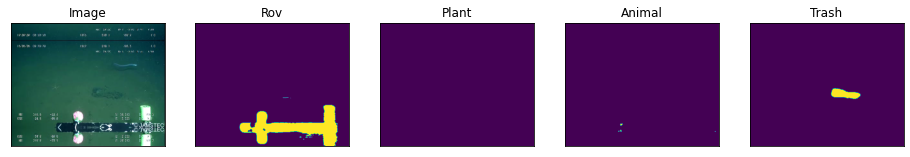

In [ ]:
gtf.Predict("/content/dataset/material_version/val/vid_000076_frame0000005.jpg", vis=True);